In [15]:
%pip install -q -r ../requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools
import scipy.stats as statsmodels
import statsmodels.tsa.stattools
import scipy.stats as stats

In [17]:
series=pd.read_csv('AirPassengers.csv')

In [18]:
series

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [19]:
series['Month']=pd.to_datetime(series['Month'])
series.set_index('Month',inplace=True)

In [20]:
def testeestacionario(x):
    kpssx=statsmodels.tsa.stattools.kpss(x)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste>valorcritico:
        texto='A série NÃO estacionária'
    else:
        texto='A série É estacionária'
    return texto

In [21]:
def testenormal(x):
    e,p=stats.shapiro(x)
    texto='A série NÃO é normal'
    if p>=0.05:
        texto='A série É normal' 
    return texto

In [22]:
testeestacionario(series)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_83185/597850919.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=statsmodels.tsa.stattools.kpss(x)


'A série NÃO estacionária'

In [23]:
testenormal(series)

'A série NÃO é normal'

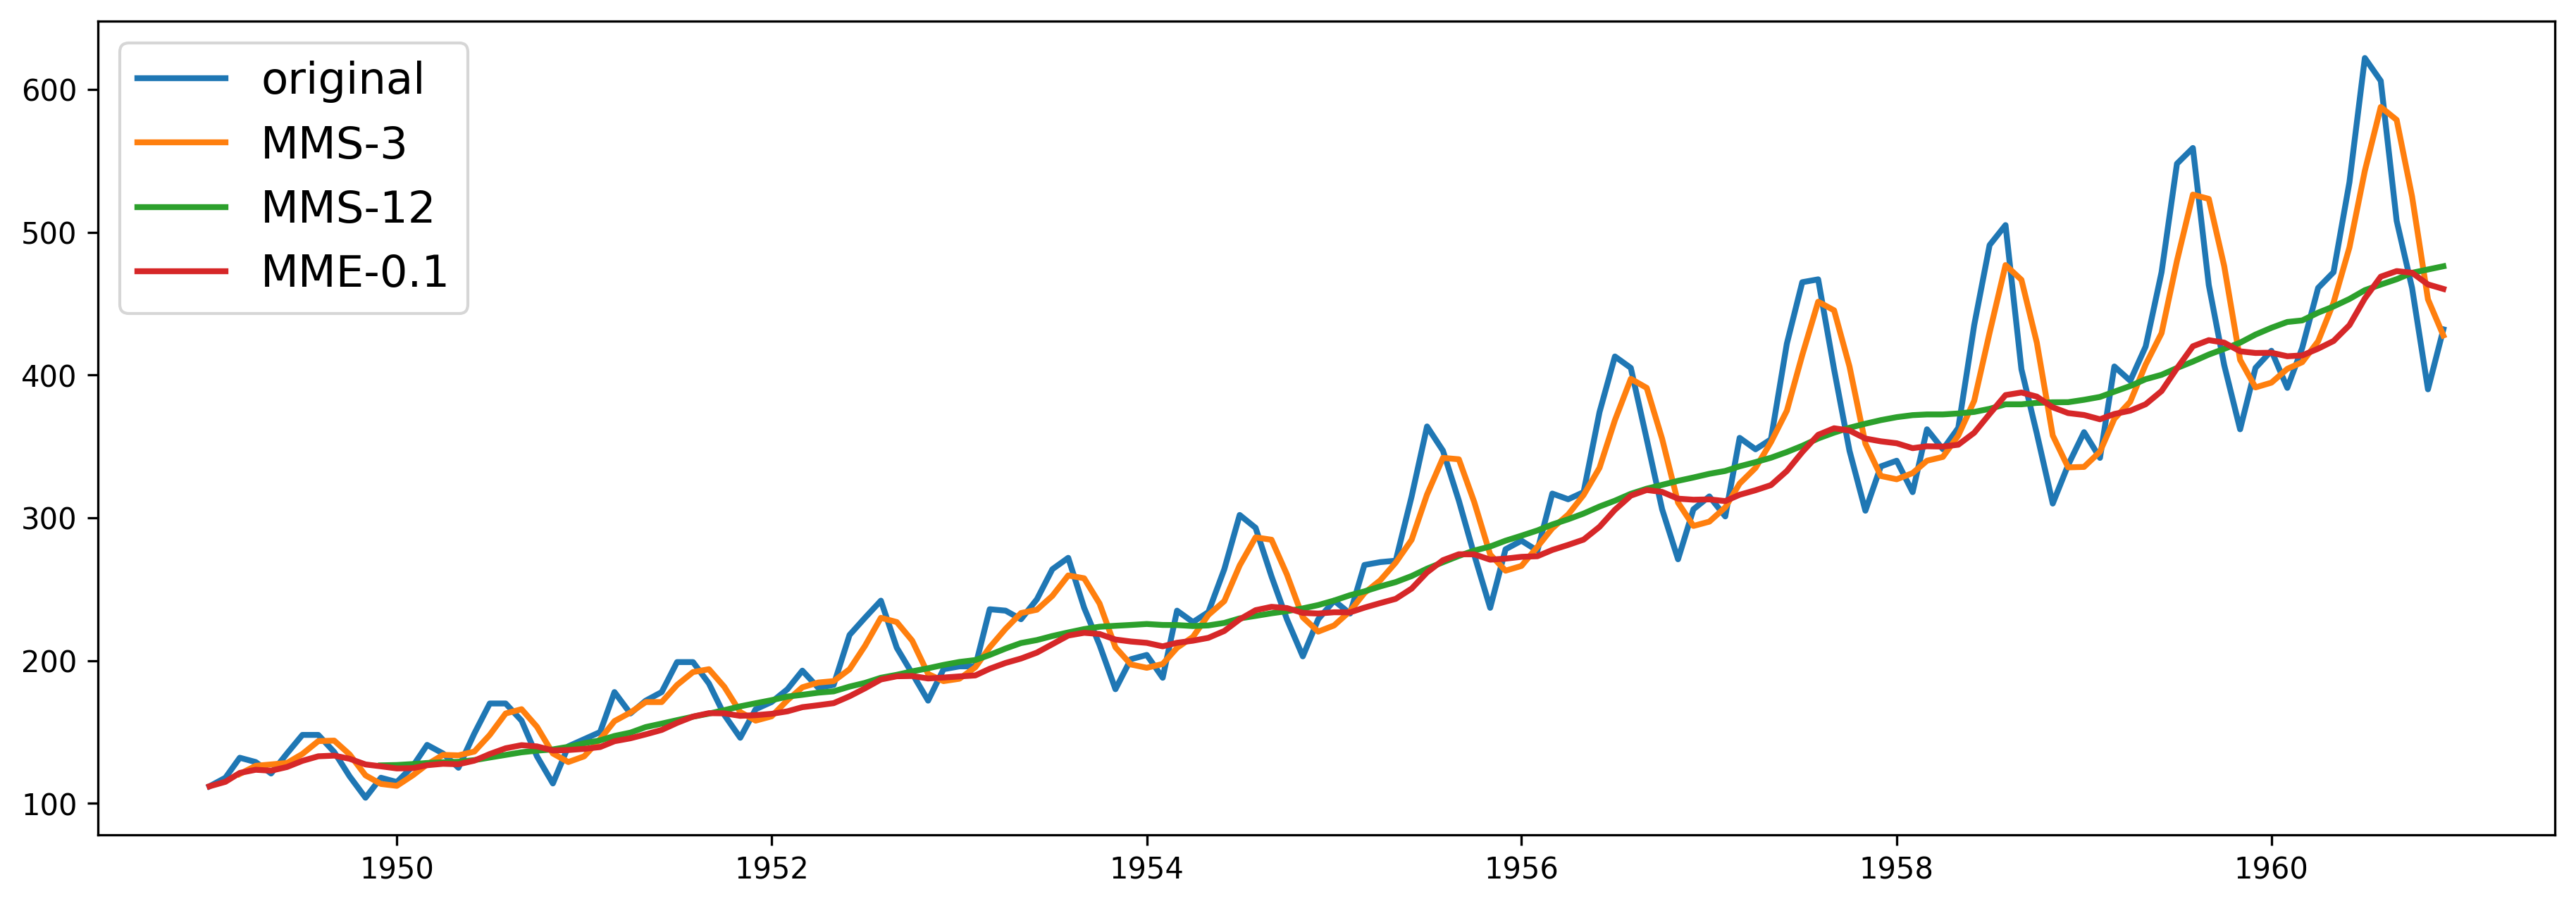

In [24]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(series,label='original',lw=2)
plt.plot(series.rolling(3).mean(),label='MMS-3',lw=2)
plt.plot(series.rolling(12).mean(),label='MMS-12',lw=2)
plt.plot(series.ewm(alpha=0.1).mean(),label='MME-0.1',lw=2)
plt.legend(fontsize=15)

# Machine Learning - nao faça em casa

In [25]:
MMS10=series.rolling(10).mean()
MMS10.columns=['MMS10']
EXP5=series.ewm(alpha=0.5).mean()
EXP5.columns=['EXP5']
seriesall=pd.concat([series,MMS10,EXP5],axis=1)



In [26]:
seriesall['MESES']=np.arange(len(seriesall))
seriesall

,#Passengers,MMS10,EXP5,MESES
Month,,,,
1949-01-01,112,NaN,112.000000,0
1949-02-01,118,NaN,116.000000,1
1949-03-01,132,NaN,125.142857,2
1949-04-01,129,NaN,127.200000,3
1949-05-01,121,NaN,124.000000,4
...,...,...,...,...
1960-08-01,606,469.0,582.096411,139
1960-09-01,508,483.6,545.048205,140
1960-10-01,461,489.2,503.024103,141


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Modelo 1

In [28]:
X=seriesall.dropna(axis=0)[['MESES']].values
Y=seriesall.dropna(axis=0)[['#Passengers']].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=XGBRegressor()
model.fit(x_train,y_train)
print(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))

47.88610904671133


# Modelo 2

In [29]:
X=seriesall.dropna(axis=0)[['EXP5']].values
Y=seriesall.dropna(axis=0)[['#Passengers']].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=XGBRegressor()
model.fit(x_train,y_train)
print(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))

32.25674077457741


# Modelo 3

In [30]:
X=seriesall.dropna(axis=0)[['MESES']].values[0:80]
Y=seriesall.dropna(axis=0)[['#Passengers']].values[0:80]
model=XGBRegressor()
model.fit(X,Y)
seriesall['PREDICAO']=model.predict(seriesall[['MESES']].values)

In [31]:
seriesall

,#Passengers,MMS10,EXP5,MESES,PREDICAO
Month,,,,,
1949-01-01,112,NaN,112.000000,0,118.990128
1949-02-01,118,NaN,116.000000,1,118.990128
1949-03-01,132,NaN,125.142857,2,118.990128
1949-04-01,129,NaN,127.200000,3,118.990128
1949-05-01,121,NaN,124.000000,4,118.990128
...,...,...,...,...,...
1960-08-01,606,469.0,582.096411,139,317.978058
1960-09-01,508,483.6,545.048205,140,317.978058
1960-10-01,461,489.2,503.024103,141,317.978058


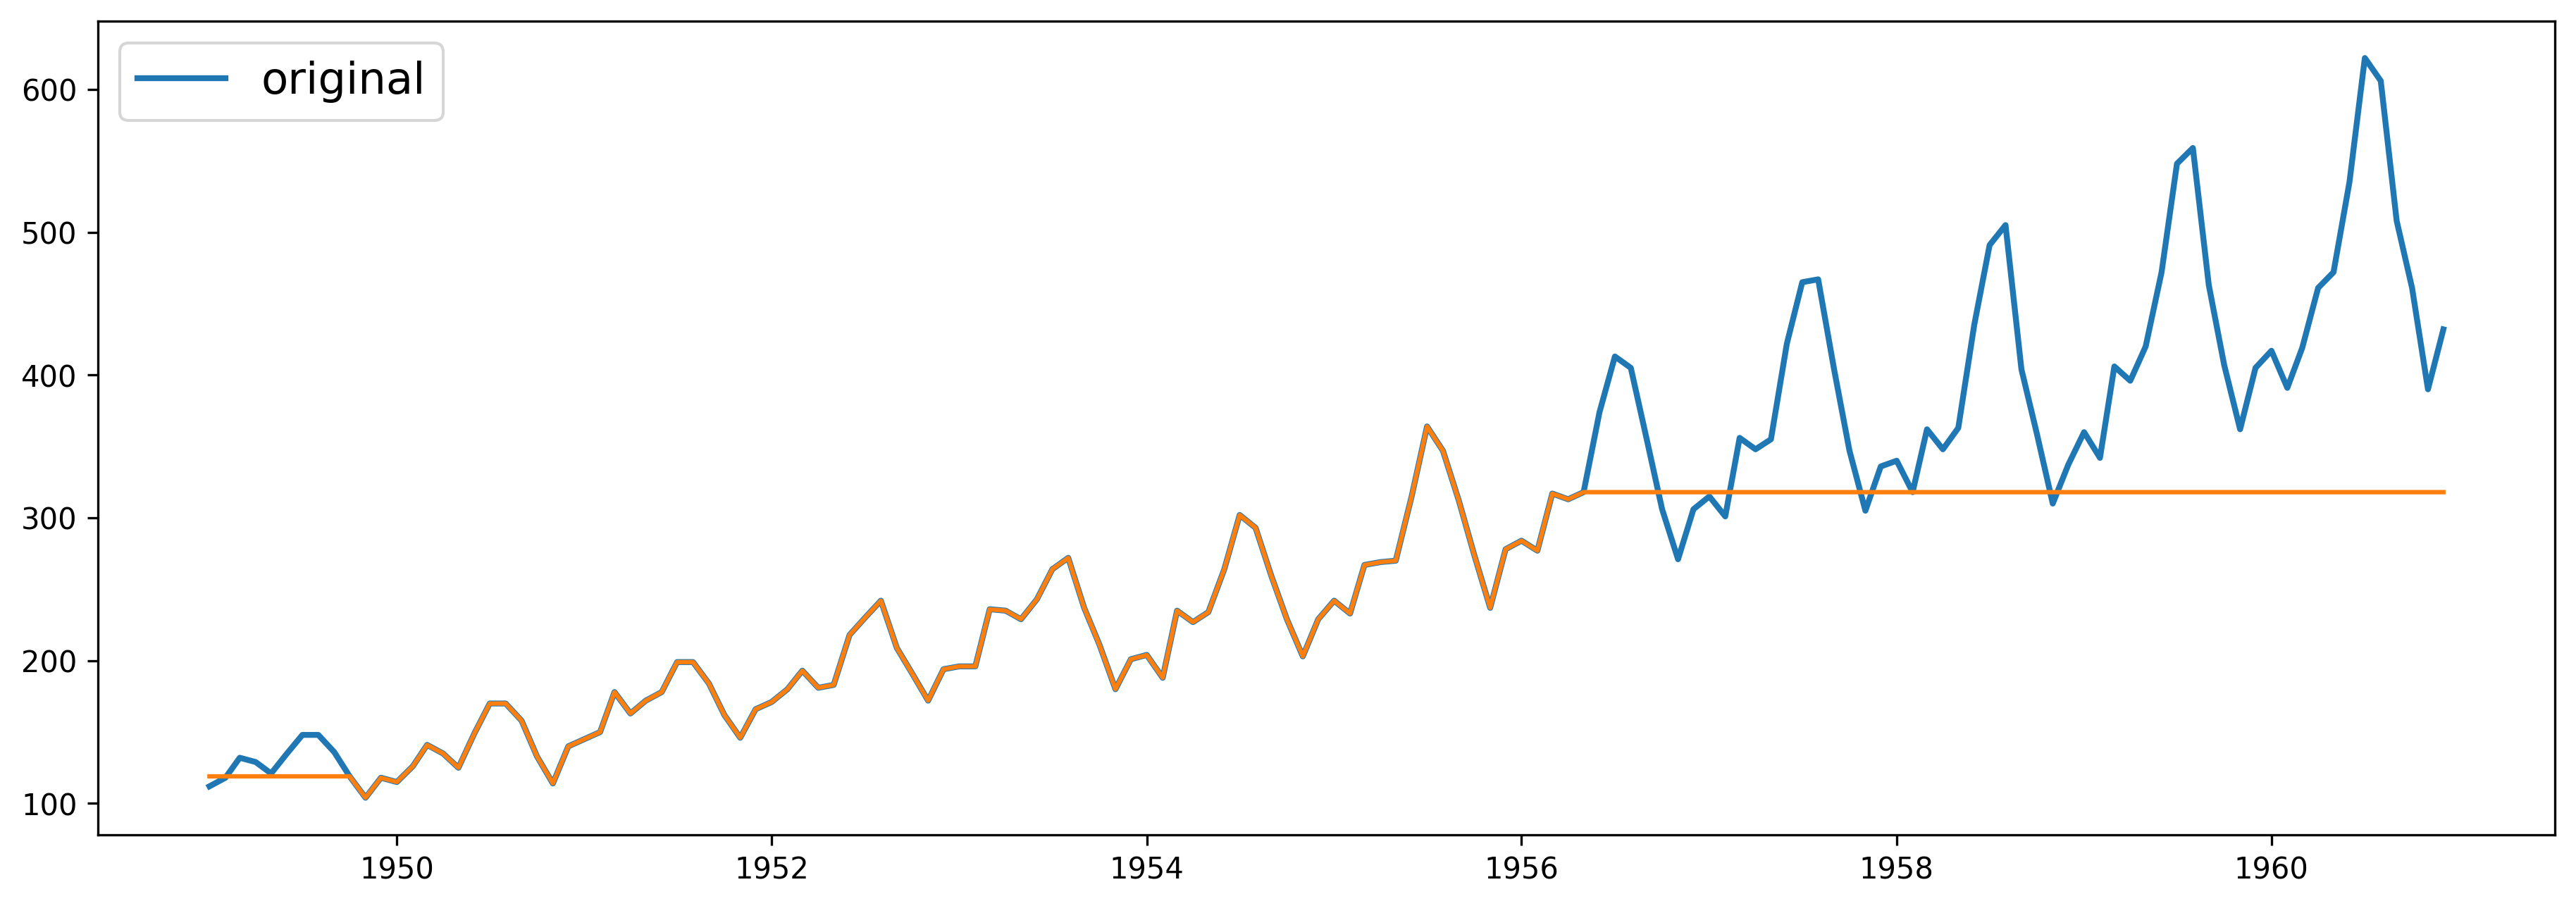

In [32]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(series,label='original',lw=2)
plt.plot(seriesall['PREDICAO'])
plt.legend(fontsize=15)

# Método Versão

In [33]:
seriesall.head(10)

,#Passengers,MMS10,EXP5,MESES,PREDICAO
Month,,,,,
1949-01-01,112,NaN,112.000000,0,118.990128
1949-02-01,118,NaN,116.000000,1,118.990128
1949-03-01,132,NaN,125.142857,2,118.990128
1949-04-01,129,NaN,127.200000,3,118.990128
1949-05-01,121,NaN,124.000000,4,118.990128
1949-06-01,135,NaN,129.587302,5,118.990128
1949-07-01,148,NaN,138.866142,6,118.990128
1949-08-01,148,NaN,143.450980,7,118.990128
1949-09-01,136,NaN,139.718200,8,118.990128


In [34]:
df=pd.DataFrame()
nsplit=4
for i in range(nsplit+1):
    if i<nsplit:
        coluna=f'T_{i}'
        df[coluna]=seriesall['#Passengers'].shift(-i).values
    if i==nsplit:
        coluna='TARGET'
        df[coluna]=seriesall['#Passengers'].shift(-i).values

In [35]:
seriesall.head(10)

,#Passengers,MMS10,EXP5,MESES,PREDICAO
Month,,,,,
1949-01-01,112,NaN,112.000000,0,118.990128
1949-02-01,118,NaN,116.000000,1,118.990128
1949-03-01,132,NaN,125.142857,2,118.990128
1949-04-01,129,NaN,127.200000,3,118.990128
1949-05-01,121,NaN,124.000000,4,118.990128
1949-06-01,135,NaN,129.587302,5,118.990128
1949-07-01,148,NaN,138.866142,6,118.990128
1949-08-01,148,NaN,143.450980,7,118.990128
1949-09-01,136,NaN,139.718200,8,118.990128


In [36]:
df

,T_0,T_1,T_2,T_3,TARGET
0,112,118.0,132.0,129.0,121.0
1,118,132.0,129.0,121.0,135.0
2,132,129.0,121.0,135.0,148.0
3,129,121.0,135.0,148.0,148.0
4,121,135.0,148.0,148.0,136.0
...,...,...,...,...,...
139,606,508.0,461.0,390.0,432.0
140,508,461.0,390.0,432.0,NaN
141,461,390.0,432.0,NaN,NaN
142,390,432.0,NaN,NaN,NaN


In [37]:
df.iloc[len(df)-nsplit]

T_0       508.0
T_1       461.0
T_2       390.0
T_3       432.0
TARGET      NaN
Name: 140, dtype: float64

In [38]:
ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

In [39]:
ultimalinha

[508.0, 461.0, 390.0, 432.0]

In [40]:
df=df.dropna(axis=0)

In [41]:
df

,T_0,T_1,T_2,T_3,TARGET
0,112,118.0,132.0,129.0,121.0
1,118,132.0,129.0,121.0,135.0
2,132,129.0,121.0,135.0,148.0
3,129,121.0,135.0,148.0,148.0
4,121,135.0,148.0,148.0,136.0
...,...,...,...,...,...
135,461,472.0,535.0,622.0,606.0
136,472,535.0,622.0,606.0,508.0
137,535,622.0,606.0,508.0,461.0
138,622,606.0,508.0,461.0,390.0


In [42]:
X=df.drop('TARGET',axis=1).values
Y=df['TARGET'].values
model=XGBRegressor()
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
model.predict(np.array([ultimalinha]))

array([489.98022], dtype=float32)

In [44]:
ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))

In [45]:
ultimalinha

[508.0, 461.0, 390.0, 432.0, 489.98022]

In [46]:
daux=pd.DataFrame([ultimalinha],columns=df.columns)

In [47]:
daux

,T_0,T_1,T_2,T_3,TARGET
0,508.0,461.0,390.0,432.0,489.980225


In [48]:
df=pd.concat([df,daux],ignore_index=True)

In [49]:
df

,T_0,T_1,T_2,T_3,TARGET
0,112.0,118.0,132.0,129.0,121.000000
1,118.0,132.0,129.0,121.0,135.000000
2,132.0,129.0,121.0,135.0,148.000000
3,129.0,121.0,135.0,148.0,148.000000
4,121.0,135.0,148.0,148.0,136.000000
...,...,...,...,...,...
136,472.0,535.0,622.0,606.0,508.000000
137,535.0,622.0,606.0,508.0,461.000000
138,622.0,606.0,508.0,461.0,390.000000
139,606.0,508.0,461.0,390.0,432.000000


In [50]:
serisfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values) + list(df['TARGET'].values),columns=['#Passengers'])

In [51]:
serisfinal

,#Passengers
0,112.000000
1,118.000000
2,132.000000
3,129.000000
4,121.000000
...,...
140,508.000000
141,461.000000
142,390.000000
143,432.000000


In [52]:
# Verificar variação no nsplit
npredicao=40
seriesfinal=seriesall['#Passengers'].reset_index(drop=True).to_frame()

for n in range(npredicao):
    
    
    
    df=pd.DataFrame()
    nsplit=4
    for i in range(nsplit+1):
        if i<nsplit:
            coluna=f'T_{i}'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
        if i==nsplit:
            coluna='TARGET'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
    
    
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])
    
    df=df.dropna(axis=0)
    X=df.drop('TARGET',axis=1).values
    Y=df[['TARGET']].values
    model=XGBRegressor()
    model.fit(X,Y)
    #fazendo predicao
    ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))
    
    daux=pd.DataFrame([ultimalinha],columns=df.columns)
    df=pd.concat([df,daux],ignore_index=True)
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

    seriesfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values)+list(df['TARGET'].values),columns=['#Passengers'])

Text(0.5, 1.0, 'NSPLIT=4')

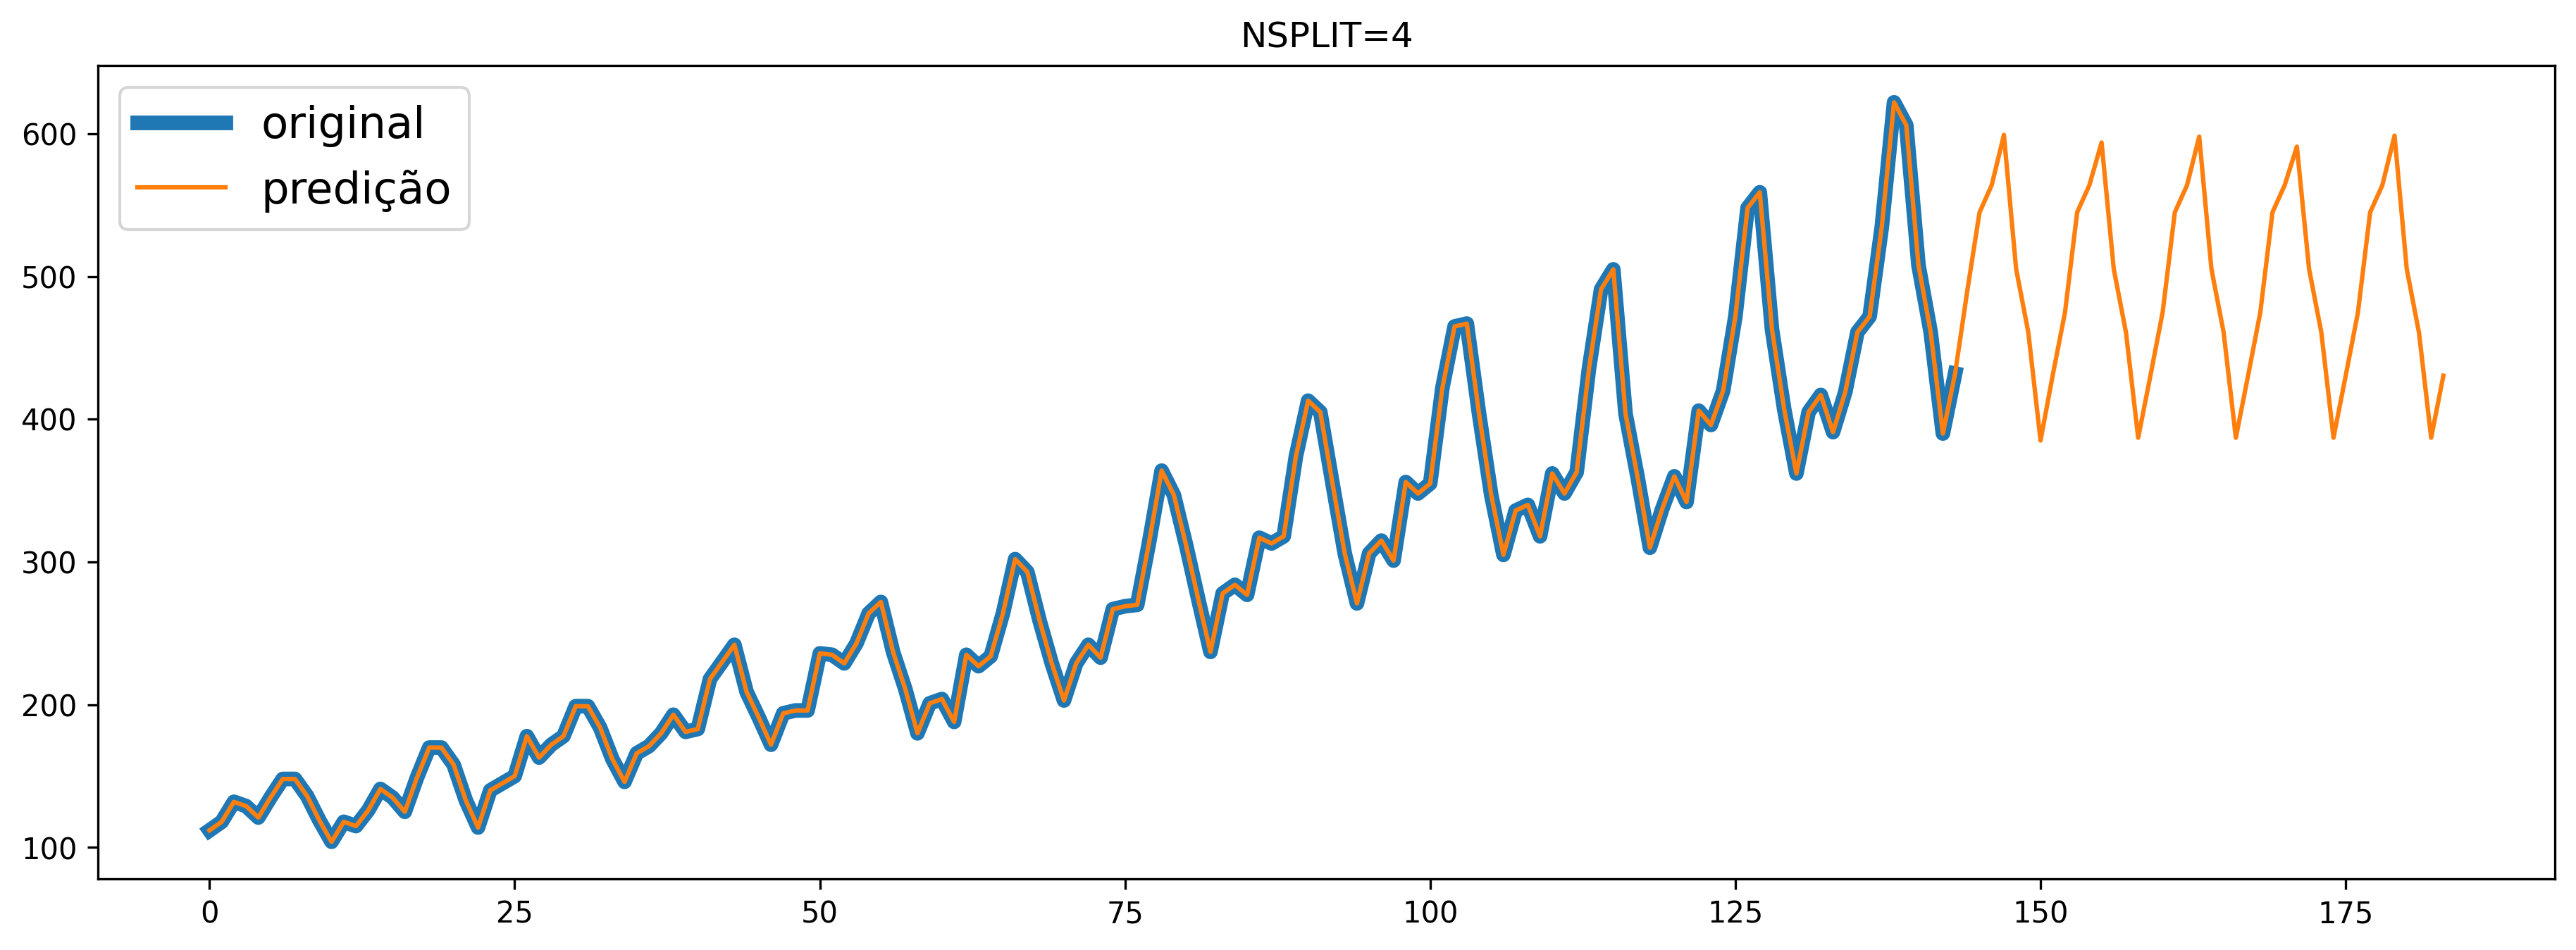

In [53]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(seriesall['#Passengers'].values,label='original',lw=5)
plt.plot(seriesfinal,label='predição')
plt.legend(fontsize=15)
plt.title('NSPLIT=4')

In [54]:
# Verificar variação no nsplit
npredicao=40
seriesfinal=seriesall['#Passengers'].reset_index(drop=True).to_frame()

for n in range(npredicao):
    
    
    
    df=pd.DataFrame()
    nsplit=12
    for i in range(nsplit+1):
        if i<nsplit:
            coluna=f'T_{i}'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
        if i==nsplit:
            coluna='TARGET'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
    
    
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])
    
    df=df.dropna(axis=0)
    X=df.drop('TARGET',axis=1).values
    Y=df[['TARGET']].values
    model=XGBRegressor()
    model.fit(X,Y)
    #fazendo predicao
    ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))
    
    daux=pd.DataFrame([ultimalinha],columns=df.columns)
    df=pd.concat([df,daux],ignore_index=True)
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

    seriesfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values)+list(df['TARGET'].values),columns=['#Passengers'])

Text(0.5, 1.0, 'NSPLIT=12')

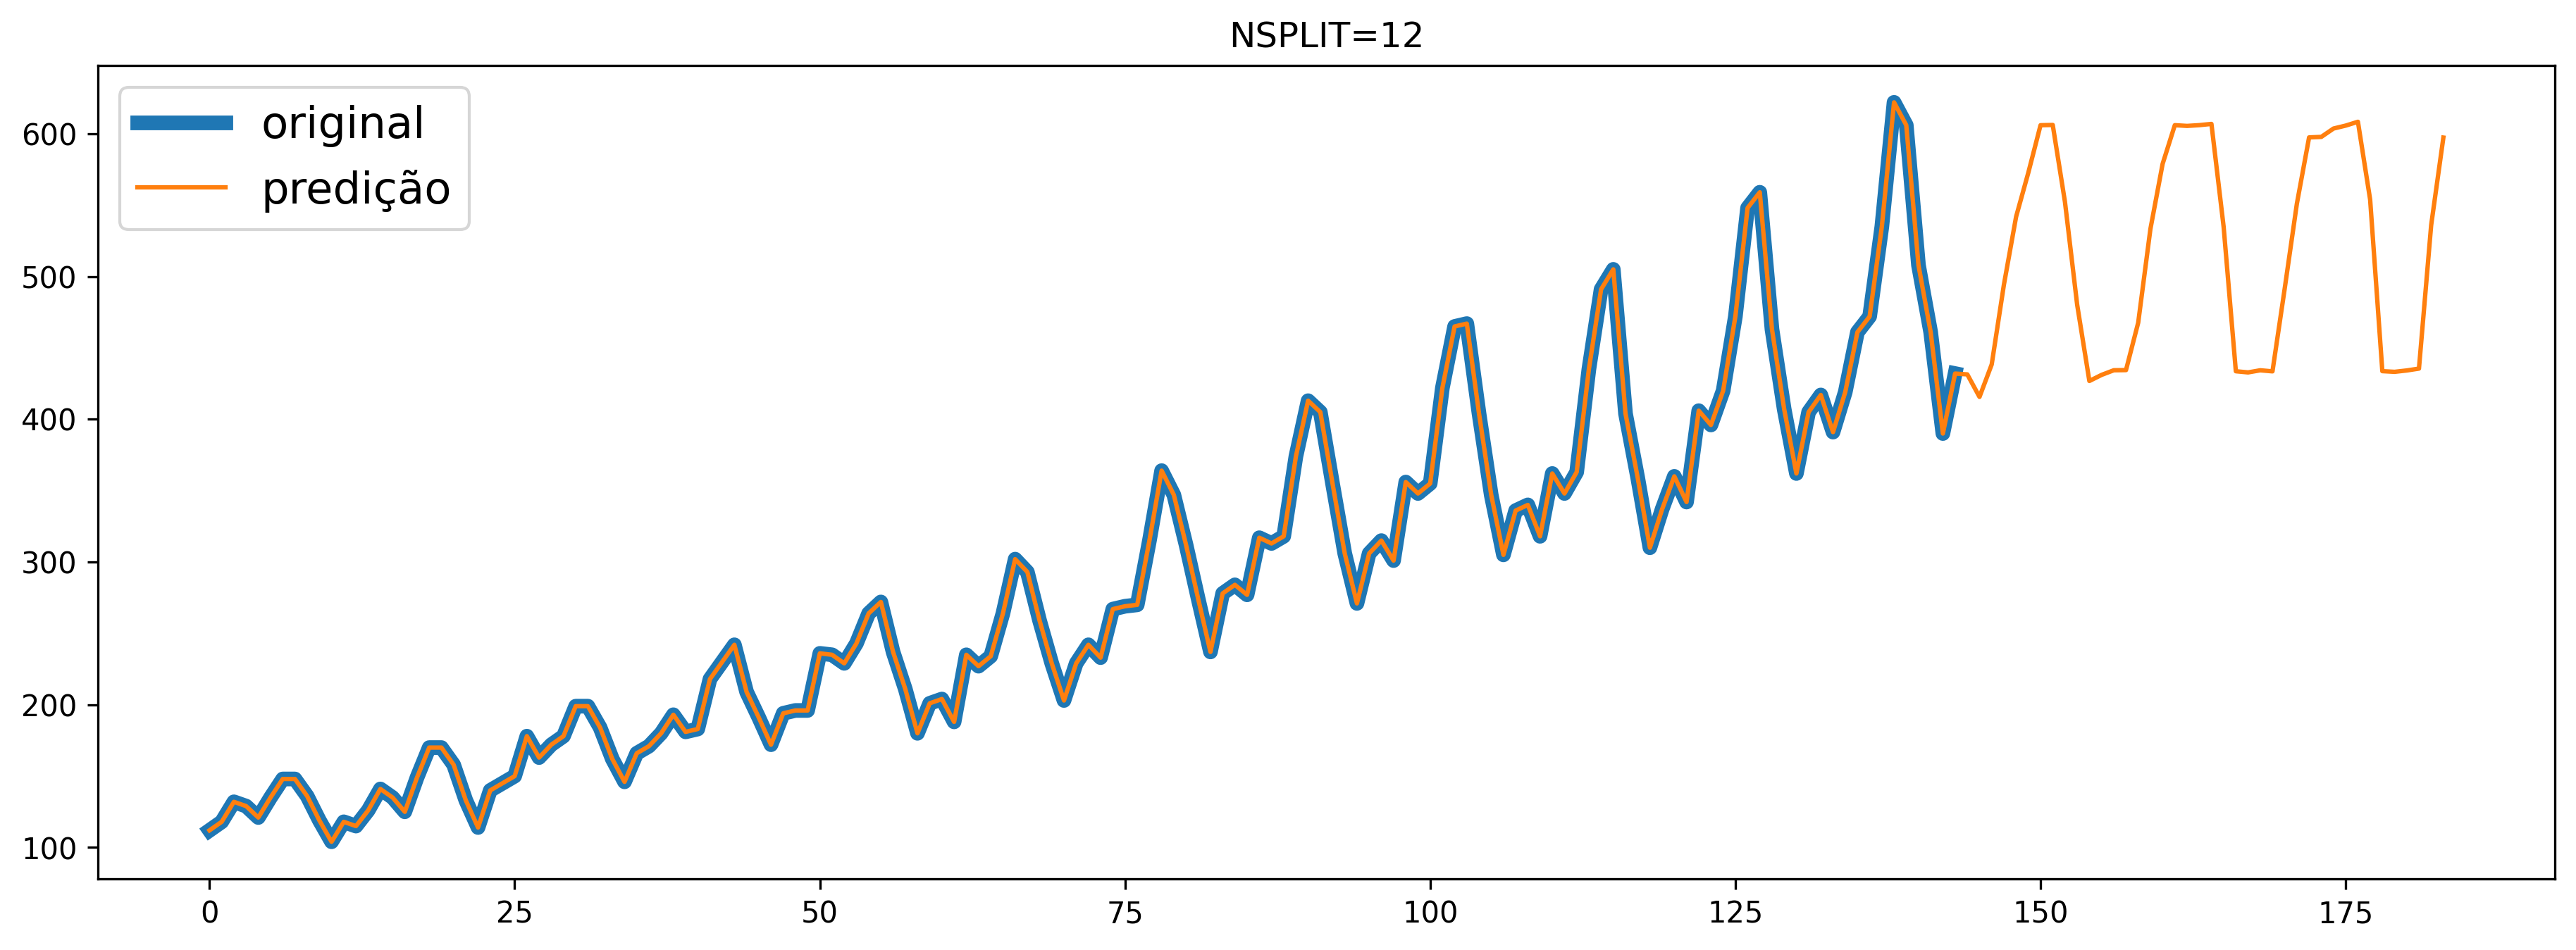

In [55]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(seriesall['#Passengers'].values,label='original',lw=5)
plt.plot(seriesfinal,label='predição')
plt.legend(fontsize=15)
plt.title('NSPLIT=12')

In [56]:
# Verificar variação no nsplit
npredicao=40
seriesfinal=seriesall['#Passengers'].reset_index(drop=True).to_frame()

for n in range(npredicao):
    
    
    
    df=pd.DataFrame()
    nsplit=24
    for i in range(nsplit+1):
        if i<nsplit:
            coluna=f'T_{i}'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
        if i==nsplit:
            coluna='TARGET'
            df[coluna]=seriesfinal['#Passengers'].shift(-i).values
    
    
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])
    
    df=df.dropna(axis=0)
    X=df.drop('TARGET',axis=1).values
    Y=df[['TARGET']].values
    model=XGBRegressor()
    model.fit(X,Y)
    #fazendo predicao
    ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))
    
    daux=pd.DataFrame([ultimalinha],columns=df.columns)
    df=pd.concat([df,daux],ignore_index=True)
    
    ultimalinha=list(df.iloc[len(df)-nsplit].values[0:nsplit])

    seriesfinal=pd.DataFrame(list(df.drop('TARGET',axis=1).iloc[0].values)+list(df['TARGET'].values),columns=['#Passengers'])

Text(0.5, 1.0, 'NSPLIT=24')

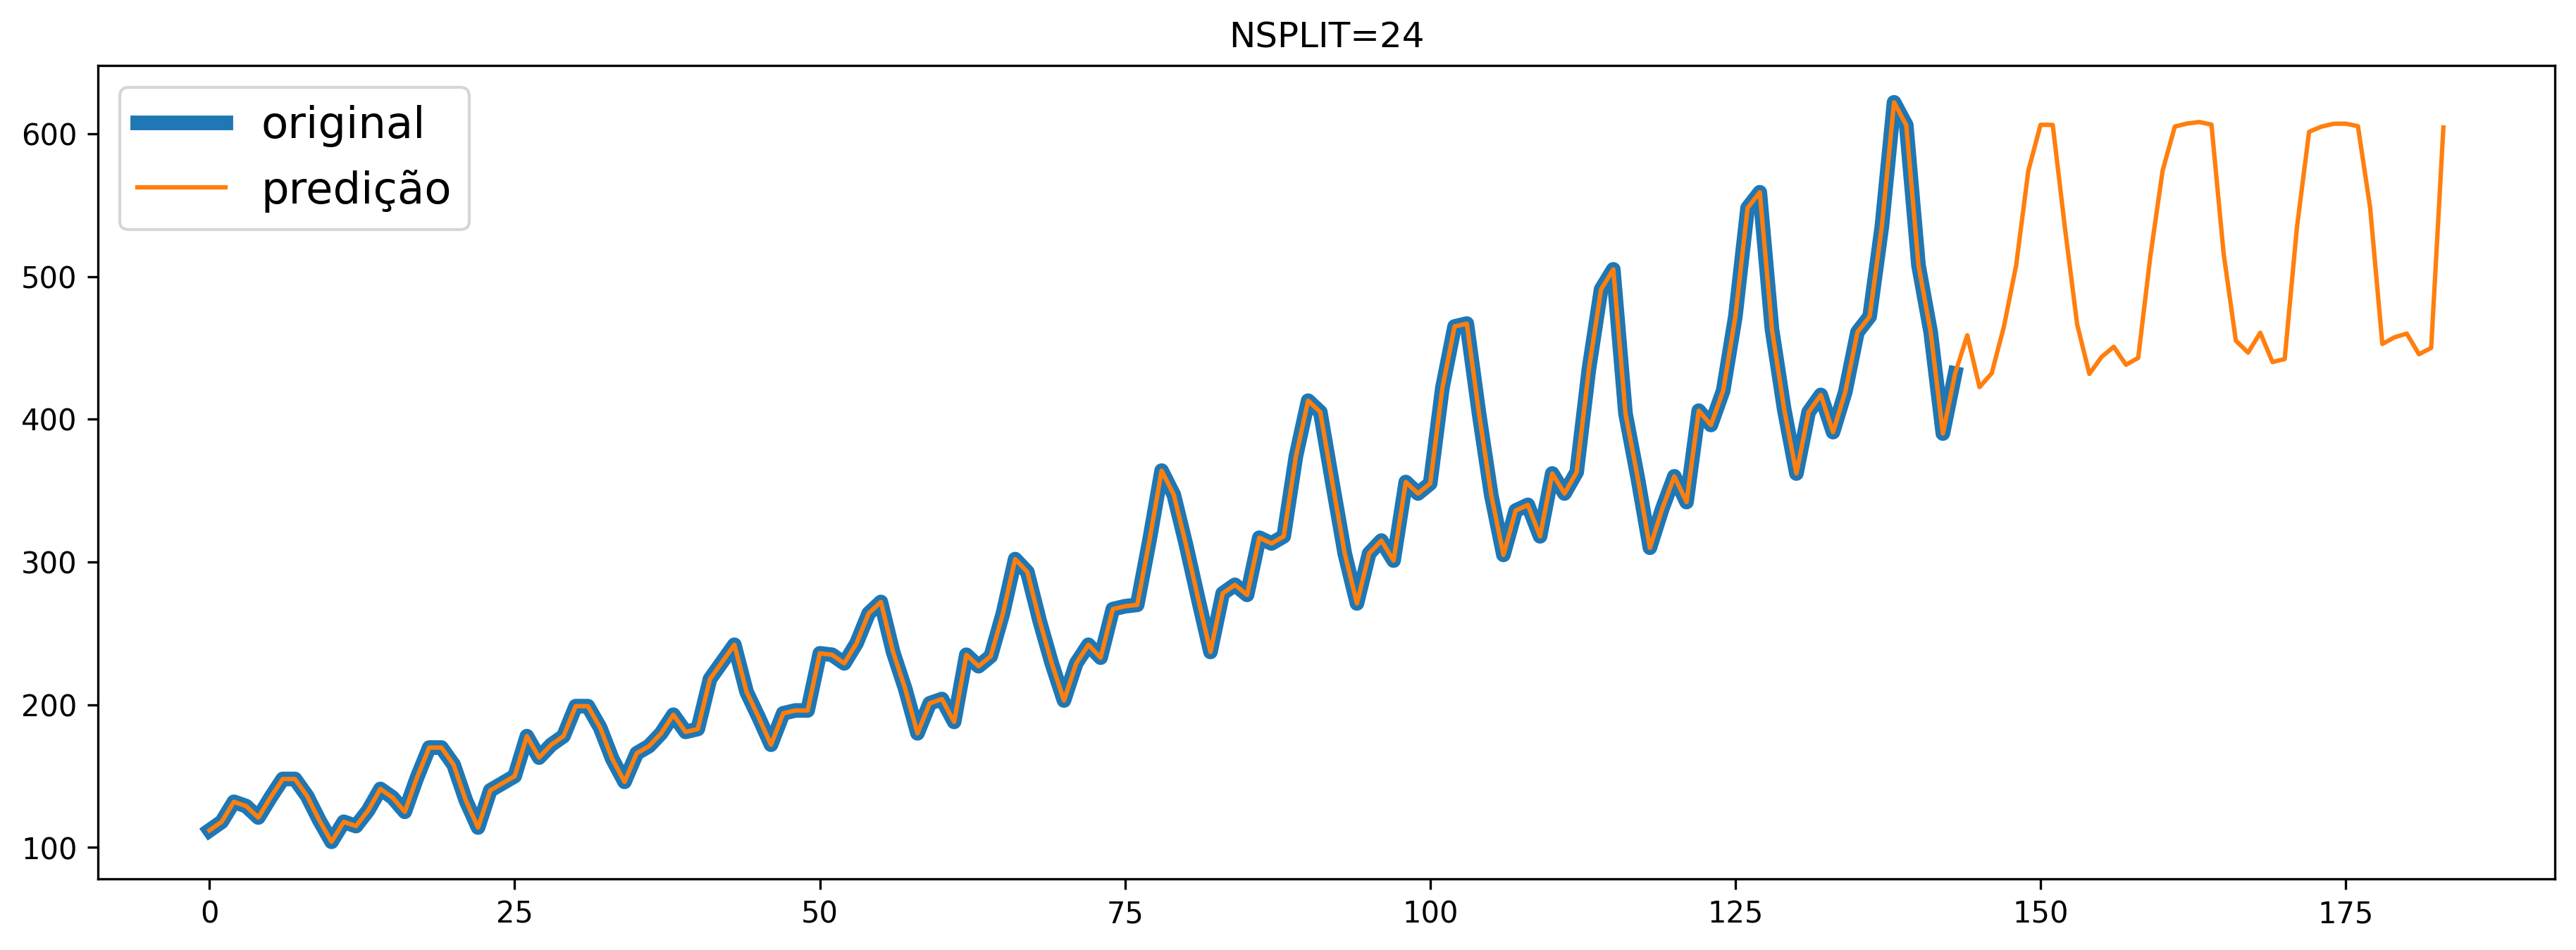

In [57]:
plt.figure(dpi=300,figsize=(15,5))
plt.plot(seriesall['#Passengers'].values,label='original',lw=5)
plt.plot(seriesfinal,label='predição')
plt.legend(fontsize=15)
plt.title('NSPLIT=24')